<a href="https://colab.research.google.com/github/rishbh/Customer_Segmentation/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import dependancies


In [ ]:
data_path = "/content/drive/MyDrive/Data/Mall_Customers.csv"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans as km 


#Data Collection and analysis


In [ ]:
#loading data set into pd dataframe
customer_data=pd.read_csv(data_path)#print first 5 rows and see what are the features used here
customer_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#finding the number of rows and columns
nrows=customer_data.shape[0]
ncols=customer_data.shape[1]



nrows= 200 and ncols= 5


In [ ]:
#getting some info about customer_data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#checking for ull values #isnull function checks if a particular cell value is null or not
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# As we are requiring only Annual income and Spending score so 
#getting these values only
#iloc use for cols searching here it searches for  index 3 , index 4
# col number here annual salary and spending scores.ki all values and store in variable x

x=customer_data.iloc[:,[3,4]].values#as an array store hogi x mein ye values 
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [ ]:
#here use x axis=Annual salary use y-axis=spending score



#Choosing K value the number of clusters 



In [ ]:
#as we do not know the number of clusters so use the elbow mwthod to find
#best possible value of K

##WCSS= within cluster value of Sum of squared error
wcss=[]

for i in range(1,11):#possible k values in (1 to 10)
  kmeans=km(n_clusters= i ,init='k-means++',random_state=42)#takes three parameters
  kmeans.fit(x)#fit->data bhej rhe hain kmeans ko
  # Now for each cluster kmeans.inertia_ gives SSE and then append it in wcss
  wcss.append(kmeans.inertia_)




<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

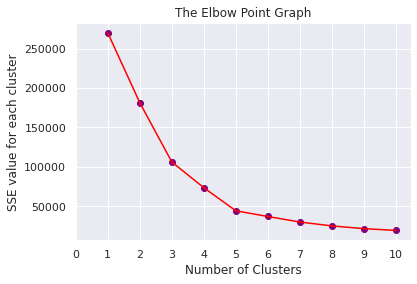

In [33]:
#plotting an elbow graph and find the k value
sns.set()
plt.plot(range(1,11) , wcss,color='red')            #plt ->plot(a method) us chart ka hi name plt rkh diya
plt.scatter(range(1,11) , wcss,color='purple') 
#(X axis values, Y-axis values )
plt.xticks(range(0,11,1))
plt.title("The Elbow Point Graph")
plt.xlabel('Number of Clusters')
plt.ylabel('SSE value for each cluster')
plt



In [ ]:
#here two elbow points come so after n=5 
#no sharp drop is there so choose n=5





#Optimal number of clusters=5 and then Training_algo eith k=5


In [36]:
kmeans=km(n_clusters=5,init='k-means++',random_state=0)

In [37]:
# return the label of cluster for each datapoint ki ye wala 
#datapoint is cluster id mein lie karta hain
#Y mein serial wise datapoints ka label hoga 
Y =kmeans.fit_predict(x)#ye fitpredict btayega ki konse 
#cluster mein hai
print(Y)
##IMP: See if we do not pass three paarmeters in 
#kmeans then we get diff Y
#Now we get clusters id=0->4

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


Visualising Clusters


In [ ]:
#each cluster has centroid
#we calculate 5 centroi

Text(0, 0.5, 'Spending Score')

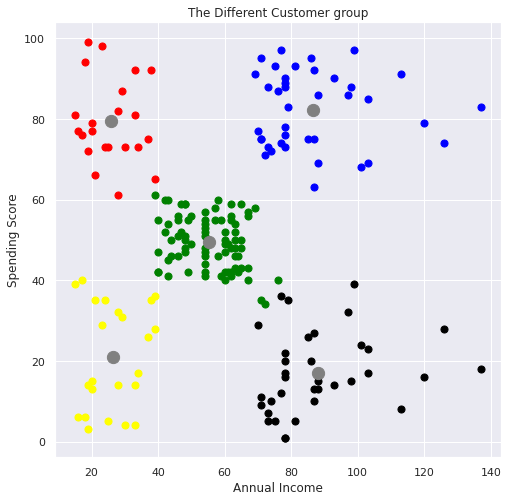

In [45]:
#plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
#X[Y==0 ,0]= X coordinate ,, X[Y==0 ,1]=Y-coordinate s=size of dots
plt.scatter(x[Y==0 ,0] , x[Y==0 ,1],s=50,c='green',label='Cluster-1') #For Cluster id=0
plt.scatter(x[Y==1 ,0] , x[Y==1 ,1],s=50,c='red',label='Cluster-2')#For cluster id=1,Y=1
plt.scatter(x[Y==2 ,0] , x[Y==2 ,1],s=50,c='blue',label='Cluster-3')#For cluster id=2,Y=2
plt.scatter(x[Y==3 ,0] , x[Y==3 ,1],s=50,c='yellow',label='Cluster-4')#For cluster id=3,Y=3
plt.scatter(x[Y==4 ,0] , x[Y==4 ,1],s=50,c='black',label='Cluster-5')  #For cluster id=4,Y=4

    #plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,c='grey',label='Centroids')
plt.title('The Different Customer group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')






In [ ]:
#Insight:
#Give offers to customer_id=3,4as they are spending %less inspite of more Annual Income(c_id=4)
#Important for malls



